Figure saved as 'roc_curves_classifier_comparison.pdf' with transparent background


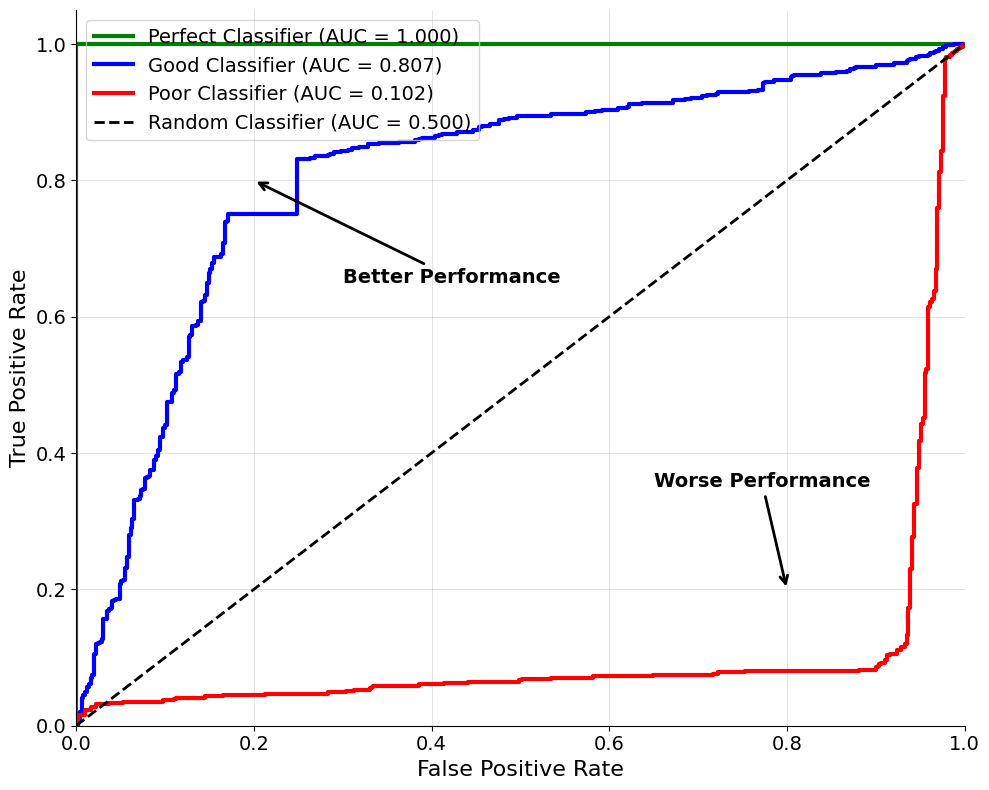

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Set style for better-looking plots
plt.style.use('default')  # Use default style for more control
plt.rcParams['figure.facecolor'] = 'none'  # Transparent figure background
plt.rcParams['axes.facecolor'] = 'none'    # Transparent axes background
plt.rcParams['savefig.facecolor'] = 'none' # Transparent when saving

# Figure: Perfect, Good, and Poor Classifiers Comparison
fig, ax = plt.subplots(figsize=(10, 8))

# Generate predictions for different quality classifiers
np.random.seed(42)
n_samples = 1000

# Perfect classifier (AUC ~1.0)
y_true = np.random.randint(0, 2, n_samples)
y_perfect_proba = np.zeros((n_samples, 2))

# Perfect separation - minimal to no overlap
y_perfect_proba[y_true == 0, 0] = 0.95 + 0.05 * np.random.rand(sum(y_true == 0))
y_perfect_proba[y_true == 1, 1] = 0.95 + 0.05 * np.random.rand(sum(y_true == 1))

y_perfect_proba[y_true == 0, 1] = 1 - y_perfect_proba[y_true == 0, 0]
y_perfect_proba[y_true == 1, 0] = 1 - y_perfect_proba[y_true == 1, 1]

# Good classifier (AUC ~0.8)
y_good_proba = np.zeros((n_samples, 2))

# Create more separation between classes with more overlap
base_prob_correct = 0.6 + 0.2 * np.random.rand(n_samples)
base_prob_wrong = 0.4 * np.random.rand(n_samples)

# Assign probabilities with significant overlap
y_good_proba[y_true == 0, 0] = base_prob_correct[y_true == 0]
y_good_proba[y_true == 0, 1] = 1 - y_good_proba[y_true == 0, 0]
y_good_proba[y_true == 1, 1] = base_prob_correct[y_true == 1]
y_good_proba[y_true == 1, 0] = 1 - y_good_proba[y_true == 1, 1]

# Add significant misclassifications
misclass_0 = np.random.choice(np.where(y_true == 0)[0], size=int(0.25 * sum(y_true == 0)), replace=False)
misclass_1 = np.random.choice(np.where(y_true == 1)[0], size=int(0.25 * sum(y_true == 1)), replace=False)
y_good_proba[misclass_0, 0] = 0.2 + 0.3 * np.random.rand(len(misclass_0))
y_good_proba[misclass_1, 1] = 0.2 + 0.3 * np.random.rand(len(misclass_1))
y_good_proba[misclass_0, 1] = 1 - y_good_proba[misclass_0, 0]
y_good_proba[misclass_1, 0] = 1 - y_good_proba[misclass_1, 1]

# Poor classifier (AUC ~0.4) - worse than random but not too extreme
y_poor_proba = np.zeros((n_samples, 2))

# Slightly reversed predictions but not completely
y_poor_proba[y_true == 0, 1] = 0.55 + 0.25 * np.random.rand(sum(y_true == 0))  # Slightly higher prob for wrong class
y_poor_proba[y_true == 1, 0] = 0.55 + 0.25 * np.random.rand(sum(y_true == 1))  # Slightly higher prob for wrong class
y_poor_proba[y_true == 0, 0] = 1 - y_poor_proba[y_true == 0, 1]
y_poor_proba[y_true == 1, 1] = 1 - y_poor_proba[y_true == 1, 0]

# Add some noise to avoid too extreme values
noise_idx = np.random.choice(n_samples, size=int(0.2 * n_samples), replace=False)
y_poor_proba[noise_idx] = np.random.rand(len(noise_idx), 2)
y_poor_proba[noise_idx] = y_poor_proba[noise_idx] / y_poor_proba[noise_idx].sum(axis=1, keepdims=True)

# Calculate ROC curves
classifiers = [
    ('Perfect Classifier', y_perfect_proba[:, 1], 'green'),
    ('Good Classifier', y_good_proba[:, 1], 'blue'),
    ('Poor Classifier', y_poor_proba[:, 1], 'red')
]

for name, y_proba, color in classifiers:
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=color, linewidth=3, label=f'{name} (AUC = {roc_auc:.3f})')

ax.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.500)')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
# Remove title
ax.legend(loc="upper left", fontsize=14)
ax.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=14)

# Add annotations
ax.annotate('Better Performance', xy=(0.2, 0.8), xytext=(0.3, 0.65),
            arrowprops=dict(arrowstyle='->', color='black', lw=2),
            fontsize=14, fontweight='bold')

ax.annotate('Worse Performance', xy=(0.8, 0.2), xytext=(0.65, 0.35),
            arrowprops=dict(arrowstyle='->', color='black', lw=2),
            fontsize=14, fontweight='bold')

# Remove spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# Save as PDF with transparent background
plt.savefig('roc_curves_classifier_comparison.pdf', format='pdf', dpi=300, 
            bbox_inches='tight', transparent=True)
print("Figure saved as 'roc_curves_classifier_comparison.pdf' with transparent background")

plt.show()